# AI_Tupro1
Kaenova Mahendra Auditama<sup>1</sup><br>
Adhe Akram Azhari<sup>2</sup><br>
Elita Aurora Az Zahra<sup>3</sup><br>
<sup>1</sup><a href="kaenova@student.telkomuniversity.ac.id">kaenova@student.telkomuniversity.ac.id</a><br>
<sup>2</sup><a href="adheakramazhari@student.telkomuniversity.ac.id">adheakramazhari@student.telkomuniversity.ac.id</a><br>
<sup>3</sup><a href="elitaaurora@student.telkomuniversity.ac.id">elitaaurora@student.telkomuniversity.ac.id</a><br>
Informatics Engineering, Telkom University, Indonesia<br>
2021

Proyek ini merupakan proyek pertama dari Mata Kuliah Pengantar Kecerdasan Buatan dari 3 proyek yang akan di buat. Proyek pertama ini mengimplementasikan teknik searching dalam Kecerdasan Buatan dengan Genetic Algorithm. Pada algoritma ini kami membuat populasi dan generasi yang dapat diatur. Hal lain juga kami mengimplementasikan Elitisme. Pada penyeleksian orang tua, kami menggunakan fitness kompetisi dimana akan diambil sebanyak (Jumlah Populasi - Jumlah Elitism) sehingga generasi yang terbaru akan dibuat dari Elitisme serta hasil Crossover.  
  
Pada algoritma ini dibutuhkan library ```tqdm```. Untuk menginstallnya gunakan command berikut:  
    <pre><code>pip install tqdm</code></pre>
atau
    <pre><code>conda install tqdm</code></pre>

## Overview Tugas
<hr>
<br>
Pada tugas yang diberikan, kami diminta untuk membuat suatu program yang menerapkan suatu teknik searching dengan menggunakan suatu konsep kecerdasan buatan. Dalam hal ini kami diminta untuk membuat dengan menggunakan Genetic Algorithm.  
  
Tugas tersebut memberikan kita suatu masalah untuk mencari nilai <b>maksimum</b> dari suatu fungsi:  
<br>
<img src="https://cdn.discordapp.com/attachments/766644489208201276/822318513347756042/unknown.png" align="center" width="40%"/>
dengan batasan x = [-1, 2] dan y = [-1, 1]

## Rancangan Algoritma
<hr>
Untuk menyelesaikan tugas tersebut kami merancang algoritma sesuai pada diagram di bawah:  
<br>
<img src="https://cdn.discordapp.com/attachments/766644489208201276/822322600923103252/unknown.png" align="center" width="50%">  
<br>
Dengan algoritma yang sudah dibuat kami juga menentukan bentuk kromosom yang ingin dibuat. Kromosom yang dibuat terdiri dari 8 genotip yang akan dibagi menjadi 2 bagian. Untuk 3 genotip pertama akan merepresentasikan untuk nilai x dan 3 genotip setelahnya digunakan untuk merepresentasikan nilai y. Pada setiap genotip tersebut akan diisi dengan suatu nilai bilangan bilangan bulat mulai dengan batasan [0, 9]  
<br>
<img src="https://cdn.discordapp.com/attachments/527433841690804224/822508955632664606/unknown.png" align="center" width="50%"/>
<br>  
Untuk merubah genotip-genotip tersebut menjadi suatu nilai x dan y kami menggunakan suatu rumus seperti di bawah ini:
<img src="https://cdn.discordapp.com/attachments/527433841690804224/822509203272106035/unknown.png" align="center" width="50%"/> 

## The Code
<hr>

## Import Libraries
Library python yang harus di masukkan untuk menjalankan algoritma ini

In [15]:
import random
import math
import matplotlib.pyplot as plt
from time import sleep
from tqdm import tqdm

## Chromosome Class
Untuk membuat kromosom, kami merancang bahwa kromosom akan dibuat sebagai suatu objek yang memiliki beberapa prosedur seperti pengdekodean genotip menjadi suatu nilai x dan y serta untuk menghitung fitness dari kromosom itu sendiri.

In [64]:
class kromosome():
    panjang = 8 #This must be even
    
    def decodeX(self):
        temp_genotipe = 0
        temp_integer = 0
        for i in range(int(self.panjang / 2)):
            temp_genotipe += self.kromosom[i] * (10**(-(i+1)))
            temp_integer += 9*(10**(-(i+1)))
        self.x = (-1) + (((2 - (-1))/temp_integer) * temp_genotipe)
        
    def decodeY(self):
        temp_genotipe = 0
        temp_integer = 0
        for i in range(int(self.panjang / 2)):
            temp_genotipe += self.kromosom[i+int(self.panjang / 2)] * (10**(-(i+1)))
            temp_integer += 9*(10**(-(i+1)))
        self.y = (-1) + (((1 - (-1))/temp_integer) * temp_genotipe)

    def CalculateFitness(self):
        self.fitness = (math.cos(self.x**2)*math.sin(self.y**2) + (self.x + self.y))

    def PrintKromosome(self):
        print("Fitness: {}".format(self.fitness))
        print("Fenotip X: {} Y: {}".format(self.x, self.y))
        print("Genotipe: {} \n".format(self.kromosom))

    def __init__(self):
        self.kromosom = []
        self.fitness = 0
        self.x = 0
        self.y = 0
        for j in range(self.panjang):
            self.kromosom.append(random.randint(0, 9))
        self.decodeX()
        self.decodeY()

## Genetic Algorithm Procedure and Function
Fungsi dan Prosedur utama yang dibutuhkan untuk menjalankan algoritma ini

### Initialize Population
Dalam prosedur ini digunakan sebagai generasi pertama, dimana akan digunakan untuk membuat kromosom sebanyak jumlah yang ditentukan.

In [65]:
def initialize_population(population_made):
    population = []
    for i in range(population_made): #variable
        kromosome_temp = kromosome()
        # Coded by Kaenova Mahendra Auditama (kaenova@gmail.com)
        # *not responsible if someone plagirized or copied my code
        population.append(kromosome_temp)
    return population

### CalculateKromosomeFitness
Fungsi ini digunakan untuk menghitung fitness pada setiap kromosom.

In [66]:
def calculateKromosomeFitness(population):
    for i in range(len(population)):
        population[i].CalculateFitness()

### PopulationFitnessSort
Dalam algoritma ini kami akan melakukan elitism dan selection parent sehingga dibutuhkan fungsi yang mengembalikan kromosom secara terurut mengecil dari berdasarkan fitness tersebut.


In [67]:
def PopulationFitnessSort(population: [kromosome()]):
    population = sorted(population, key=lambda x: x.fitness, reverse= 1)

    return population

### GetElitism
Fungsi ini akan mengambil kromosom terbaik dari suatu populasi yang sudah diurutkan dari yang terbesar menuju ke terkecil. Banyaknya yang diambil sebesar 1/5 dari total populasi yang ada.

In [68]:
def getElitism(population):
    get_selection = (math.floor(len(population)/ 5))
    if get_selection % 2 != 0:
        get_selection += 1
    elitism = []
    for i in range(get_selection):
        elitism.append(population[i])

    return elitism

### TournamentSelection
Fungsi ini akan mengambil kromosom-kromosom dari populasi berdasarkan fitness. Yang terambil sebanyak 4/5 dari populasi dan index yang mulai diambil merupakan index dari 1/10 populasi.

In [69]:
def tournamentSelection(population):
    get_selection = (math.floor(len(population)/ 5))
    if get_selection % 2 != 0:
       get_selection += 1
    jum_parent = (len(population) - get_selection)
    start_parent = int((get_selection / 2) - 1)
    parent = []
    for i in range(jum_parent) :
        parent.append(population[start_parent])

    return parent

### MatingPool
Dari Fungsi TournamentSelection, pada mating pool ini akan memasangkan parent-parent tersebut untuk dipersiapkan melakukan crossover.

In [70]:
def MatingPool(parent = [kromosome()]):
    parent_temp = parent
    pasangan = []
    j = 0

    for i in range(int(len(parent)/2)):
        pasangan_temp = []
        random_angka_parent = random.randint(1, (len(parent_temp)-1))
        pasangan_temp.append(parent_temp[0])
        pasangan_temp.append(parent_temp[random_angka_parent])
        pasangan.append(pasangan_temp)
        parent_temp.pop(random_angka_parent)
        parent_temp.pop(0)
        j = j + 1

    return pasangan

### Crossover
Setelah melakukan pemasang-masangan pada fungsi MatingPool dilakukan crossover pada titik yang random di genotip. Sehingga pada suatu pasangan akan menghasilkan 2 anak (child).

In [71]:
def crossover(pasangan = [[kromosome],[kromosome]]):
    populasi_anak = []
    for i in range(len(pasangan)):
        temp_pasangan = pasangan[i]
        parent1 = temp_pasangan[0]
        parent2 = temp_pasangan[1]
        panjang_potong = random.randint(1,parent1.panjang)

        children_temp1 = []
        children_temp2 = []

        for j in range(panjang_potong):
            children_temp1.append(parent1.kromosom[j])
        for k in range(len(parent1.kromosom) - panjang_potong):
            children_temp1.append(parent2.kromosom[k+panjang_potong])
        for j in range(panjang_potong):
            children_temp2.append(parent2.kromosom[j])
        for k in range(len(parent1.kromosom) - panjang_potong):
            children_temp2.append(parent1.kromosom[k+panjang_potong])

        kromosome_temp_1 = kromosome()
        kromosome_temp_2 = kromosome()
        kromosome_temp_1.kromosom = children_temp1
        kromosome_temp_2.kromosom = children_temp2
        kromosome_temp_1.CalculateFitness()
        kromosome_temp_2.CalculateFitness()
        populasi_anak.append(kromosome_temp_1)
        populasi_anak.append(kromosome_temp_2)

    return populasi_anak

### Mutation
Dalam genetika kita tidak boleh melupakan kemungkinan terjadinya suatu mutasi pada genotip-genotiup tertentu. Disini saya membuat bahwa besarnya mutasi pada suatu genotip adalah acak dari range [-0.08, 0.08] dengan kemungkinan terjadinya mutasi dibawah 1%

In [72]:
def mutation(children):
    for i in range(len(children)):
        for j in range(children[i].panjang):
            random_mutation = random.uniform(0,1)
            if (random_mutation < 0.1 ): #Setup mutasi
                if children[i].kromosom[j] > 0:
                    children[i].kromosom[j] -= 1
                else:
                    children[i].kromosom[j] += 1
    
    return children

## Other Procedure or Function
Kami juga membutuhkan prosedur atau fungsi lain yang bukan menjadi hal utama dalam algoritma ini, tetapi untuk membantu tracking generasi dan kromosom yang terjadi ketika algoritma ini berjalan

In [73]:
def printAllKromosome(population = [kromosome()]):
    for i in range(len(population)):
        population[i].PrintKromosome()

def printBestKromosom(best: kromosome, generasi):
    print(" Best Fitness from Generation {}".format(generasi+1))
    # Coded by Kaenova Mahendra Auditama (kaenova@gmail.com)
    # *not responsible if someone plagirized or copied my code
    print("Fitness: {}".format(best.fitness))
    print("Fenotip X: {} Y: {}".format(best.x, best.y))
    print("Genotipe: {} \n".format(best.kromosom))

## MAIN

How many population do you want to have? 
 [Input Even Number over 10] : 100
How many generation do you want to have?: 10000


100%|██████████| 10000/10000 [00:21<00:00, 473.29it/s]


 Best Fitness from Generation 7167
Fitness: 2.468965738939432
Fenotip X: 0.8373837383738376 Y: 0.9937993799379936
Genotipe: [1, 1, 0, 1, 0, 1, 1, 1] 



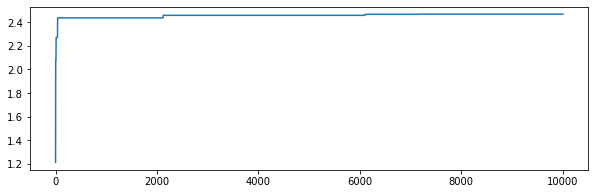

In [74]:
if __name__ == "__main__":
    population_number = int(input("How many population do you want to have? \n [Input Even Number over 10] : "))
    while (population_number % 2 != 0) or (population_number < 10):
        population_number = int(input("How many population do you want to have? \n [Input Even Number over 10] : "))

    generation = int(input("How many generation do you want to have?: "))
    while generation <= 0:
        generation = int(input("How many generation do you want to have?: "))
        
    fitness_genertaion = []
    generation_numbering = []
    
    population = initialize_population(population_number)

    best_kromosom = kromosome()
    best_generation = 0

    for i in tqdm(range(generation)):
        calculateKromosomeFitness(population)
        PopulationFitnessSort(population)
        
        #This is for plotting
        generation_numbering.append(i + 1)
        if best_kromosom.fitness < population[0].fitness:
            best_generation = i+1
            best_kromosom = population[0]
            fitness_genertaion.append(best_kromosom.fitness)
        else:
            fitness_genertaion.append(best_kromosom.fitness)
        
        elitism = getElitism(population)
        parent = tournamentSelection(population) 
        couple = MatingPool(parent)
        children = crossover(couple)
        children = mutation(children)
        population = children + elitism
    
    #make a plot
    plt.figure(figsize=(10,3))
    plt.plot(generation_numbering, fitness_genertaion)
    printBestKromosom(best_kromosom, best_generation)

## Endnote by Author
Pertama-tama kami mengucapkan terima kasih kepada Tuhan Yang Maha Esa serta, dosen kami, Ibu Fhira Nhita dan tidak lupa juga Asisten Doesn yang telah membantu kami mendapatkan ilmu serta menyelesaikan tugas ini.  
Kami tidak bertanggungjawab jika ada yang melakukan plagiarisme atau menyalin kode yang telah kami buat.